In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"/DIRECTORY/ParamData.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Difference in Followers,Party,AverageScore,AverageScoreMin,AverageScoreMax,AverageScoreStd,AveragetotalInteraction,AveragetotalInteractionMin,...,Delta from 2019,Total Votes 2023,Length of Messages,Negative%,Neutral%,Positive%,AverageSentiment,Hate%,NonHate%,AverageHate
0,0,0,-205.0,VVD,-0.270076,-4.48,4.68,2.014284,372.480916,73.0,...,-17,63,131,0.118110,0.826772,0.055118,0.937008,0.015748,0.984252,0.015748
1,12,12,346.0,SP,-0.870205,-13.00,11.39,3.090981,363.543590,18.0,...,-12,23,195,0.296875,0.588542,0.114583,0.817708,0.046875,0.953125,0.046875
2,24,24,-23.0,SGP,-4.695143,-28.00,0.89,9.606750,3.914286,0.0,...,2,16,35,0.107143,0.607143,0.285714,1.178571,0.000000,1.000000,0.000000
3,36,36,102.0,Wopke-Hoekstra (CDA),-0.776667,-2.20,2.76,1.631387,152.666667,69.0,...,-29,43,6,0.000000,0.166667,0.833333,1.833333,0.000000,1.000000,0.000000
4,48,48,459.0,Thierry-Baudet (FVD),-0.723213,-13.74,9.22,2.621491,1090.212851,63.0,...,-71,15,249,0.430435,0.395652,0.173913,0.743478,0.173913,0.826087,0.173913


In [ ]:
import numpy.ma as ma
import numpy as np
FollowsDiff=df["Difference in Followers"]
AverageScore=df["AverageScore"]
AveragetotalInteraction=df["AveragetotalInteraction"]
AverageLike=df["AverageLike"]
AverageComment=df["AverageComment"]
AverageShare=df["AverageShare"]
AverageLove=df["AverageLove"]
AverageWow=df["AverageWow"]
AverageSad=df["AverageSad"]
AverageAngry=df["AverageAngry"]
AverageCare=df["AverageCare"]
AveragePostVideoCount=df["AveragePostVideoCount"]
TotalVotes2023=df["Total Votes 2023"]
VotesDiff=df["Delta from 2019"]
AverageSentiment=df["AverageSentiment"]
Negative=df["Negative%"]
AverageHate=df["AverageHate"]
Hate=df["Hate%"]
#print(AverageSentiment)

ListOfVars=[AverageScore,AveragetotalInteraction,AverageLike,AverageComment,AverageShare,AverageLove,AverageWow,AverageSad,AverageAngry,AverageCare,AveragePostVideoCount]
ListOfVarNames=["AverageScore","AveragetotalInteraction","AverageLike","AverageComment","AverageShare","AverageLove","AverageWow","AverageSad","AverageAngry","AverageCare","AveragePostVideoCount"]
ListofCoefficients1=[]
ListofCoefficients2=[]
for i,j in zip(ListOfVars,ListOfVarNames):
  #print(i,j)
  Result=[]
  Result2=[]
  a=ma.corrcoef(ma.masked_invalid(TotalVotes2023),i)
  Result.append(a[0][1])
  #print(np.corrcoef(TotalVotes2023,i))
  b=ma.corrcoef(ma.masked_invalid(VotesDiff),i)
  Result.append(b[0][1])
  ListofCoefficients1.append(Result)
  c=ma.corrcoef(ma.masked_invalid(AverageSentiment),i)
  Result2.append(c[0][1])
  d=ma.corrcoef(ma.masked_invalid(Negative),i)
  Result2.append(d[0][1])
  e=ma.corrcoef(ma.masked_invalid(AverageHate),i)
  Result2.append(e[0][1])
  f=ma.corrcoef(ma.masked_invalid(Hate),i)
  Result2.append(f[0][1])
  ListofCoefficients2.append(Result2)
#print(ListofCoefficients2)

[[0.2823997550140953, -0.15410543741976887, 0.19230947953448818, 0.19230947953448818], [0.1314762718341779, 0.024919835627909157, 0.4617045282900649, 0.4617045282900649], [-0.15991785170544848, 0.3076925811967297, 0.736832909314364, 0.736832909314364], [0.47198763501945856, -0.349580605193532, -0.038085913526310085, -0.038085913526310085], [-0.38557264550175724, 0.47273983622352106, 0.7794639671441485, 0.7794639671441485], [-0.1985824498949251, 0.35694793518000595, 0.8025910107121783, 0.8025910107121783], [-0.26798701027893357, 0.4141921449258846, 0.8364396080524753, 0.8364396080524753], [-0.13043634856286948, 0.08099257318970605, 0.1628315888010346, 0.1628315888010346], [-0.4553441993051872, 0.6942557435132753, 0.6203236322626261, 0.6203236322626261], [-0.20716025479922606, 0.2856292570351008, 0.7193376515571379, 0.7193376515571379], [0.37494080907842675, -0.05424530138713779, 0.14869242445959377, 0.14869242445959377]]


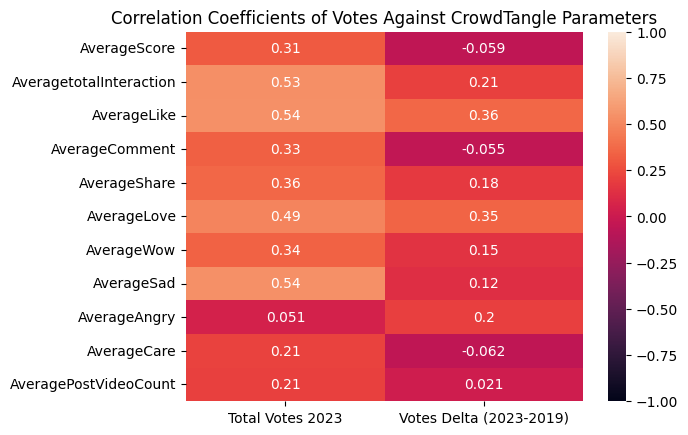

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
s=sns.heatmap(ListofCoefficients1,annot=True,xticklabels=["Total Votes 2023","Votes Delta (2023-2019)"], yticklabels=ListOfVarNames,vmin=-1,vmax=1)
plt.title("Correlation Coefficients of Votes Against CrowdTangle Parameters")
figure = s.get_figure()
figure.savefig('Correlations of Coefficients Dutch Voting.png', dpi=400)

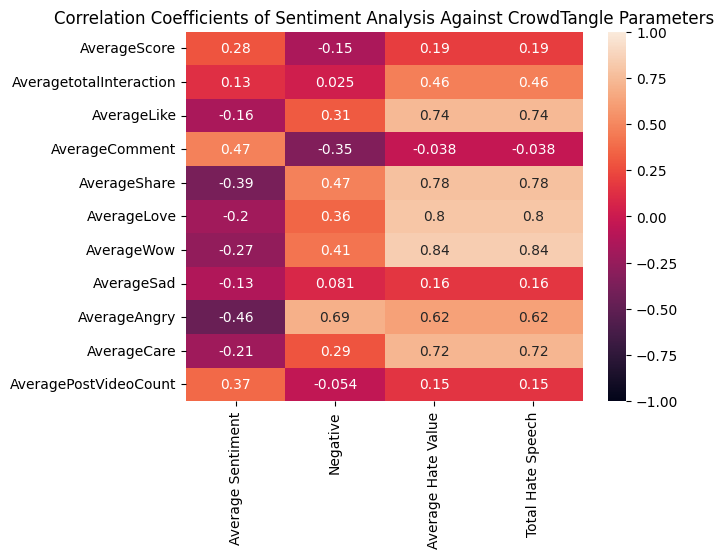

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
s=sns.heatmap(ListofCoefficients2,annot=True,xticklabels=["Average Sentiment","Negative","Average Hate Value","Total Hate Speech"], yticklabels=ListOfVarNames,vmin=-1,vmax=1)
plt.title("Correlation Coefficients of Sentiment Analysis Against CrowdTangle Parameters")
figure = s.get_figure()
figure.savefig('Correlations of Coefficients Sentiment Analysis.png', dpi=400)